# Life Satisfaction and Political Views in the Ex-Soviet Bloc
## Part 1: Replication
## a) Life Satisfaction

In the first part of this project, we attempt to replicate the life satisfaction results by country and region that were stated in the Life in Transition III Report (hereafter LiT III Report). Here, life satisfaction in a country was defined as the percentage of respondents in that country who either "agree" or "strongly agree" with the statement "all things considered, I am satisfied with my life now" (EBRD, 2016, p. 12). Each response was survey-weighted; regional averages are "simple averages of the country scores" (ibid.).

In the report, the life satisfaction levels were presented in a bar chart and reported in individual country profiles. Below is the bar chart. 

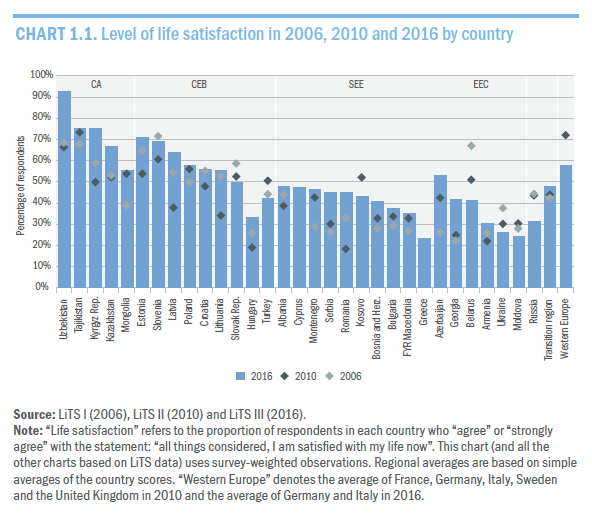

In [1]:
from IPython.display import Image
# life_satisfaction_orig_chart = Image("Life Satisfaction Chart.png")
life_satisfaction_orig_chart = Image("./data/Life Satisfaction Chart.png") # linux - repo folder
life_satisfaction_orig_chart

And below we build a dataframe with the life satisfaction levels as gleaned from the individual country profiles and/or the above chart, rounded to 2 sf. These are the life satisfaction data that we will try to replicate. Note. The life satisfaction result for the Czech Republic was not stated in the report. 

In [2]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Suppress warning about mixed data types in columns (change this later?)
import warnings
warnings.filterwarnings('ignore')

# Import Some of the useful defined functions
import useful_fun as uf
# object with different useful regions defined
regions = uf.Regions()

In [3]:
original_satisfaction = pd.DataFrame()
original_satisfaction['Country'] = regions.allCountries
original_satisfaction['Transition'] = original_satisfaction['Country'].apply(uf.transition_recoder)
original_satisfaction['Region'] = original_satisfaction['Country'].apply(uf.region_recoder)
original_satisfaction['Life Satisfaction (%)'] = [48, 30, 53, 41, 40, 37, 56, 48, 71, 35, 42, 73, 24, 33, 43, 67, 43, 75, 64, 56, 24, 55, 46, 58, 45, 32, 46, 50, 69, 75, 42, 26, 93]
original_satisfaction.head()

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48
1,Armenia,True,E Europe & Caucasus,30
2,Azerbaijan,True,E Europe & Caucasus,53
3,Belarus,True,E Europe & Caucasus,41
4,Bosnia and Herz.,True,SE Europe,40


Now we calculate the mean life satisfactions for the transition and western European regions.

In [4]:
# Calculate the mean life satisfaction in the transition region.
transition_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_original_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [5]:
# Calculate the mean life satisfaction in western Europe.
w_europe_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_original_satisfaction)) + '%')

Western Europe life satisfaction: 58%


## Replication of the Life satisfaction data

For replication, we load the original data from a .csv file. 'Weight 1' refers to the weight of a respondent's answers as a proportion of 1, where 1 represents the total weight of a country's respondents. Note. The total country weight does not always sum to 1 due to a precision cut-off in the .csv file.

In [6]:
# Extract the the zipped csv data if it already hasn't been extracted 
import os.path
import zipfile

if not os.path.isfile('./data/LiTS_III_2016.csv'):
    with zipfile.ZipFile("./data/LiTS_III_2016.zip","r") as zip_ref:
        zip_ref.extractall("./data/")
else:
    print('File already present')

File already present


In [7]:
# Read the table
lits_2016 = pd.read_csv('./data/LiTS_III_2016.csv') # data in the repo folder linux
# lits_2016 = pd.read_csv('LiTS III.csv')
# Select only the columns we're interested in (can increase this as we go along)
lits_2016_full = lits_2016
good_cols = ['country', 'age_pr', 'weight_sample', 'weight_one', 'q401e', 'q412', 'q421', 'q223']
lits_2016 = lits_2016.loc[:, good_cols]
# Give the columns new names
good_names = ['Country', 'Age', 'Weight Sample', 'Weight 1', 'Life Satisfaction', 'Political System', 'Inequality', 'Monthly Income']
lits_2016.columns = good_names
lits_2016.head()

,Country,Age,Weight Sample,Weight 1,Life Satisfaction,Political System,Inequality,Monthly Income
0,Albania,47,0.65471,0.000436,2.0,1.0,3.0,-99
1,Albania,58,0.50372,0.000336,2.0,1.0,2.0,50000
2,Albania,40,1.03809,0.000692,2.0,2.0,2.0,-99
3,Albania,58,0.50372,0.000336,2.0,2.0,2.0,30000
4,Albania,28,0.67950,0.000453,4.0,3.0,2.0,-97


### Define the exclusions and criteria for replication.

In [8]:
# Define exclusions and criteria.

# We want to exclude those rows for which life satisfaction is NaN, -97 ('don't know'), or -98 ('not applicable')
satisfaction_exclusions = [np.nan, -97, -98]

# We want to use those rows for which the answer to the life satisfaction statement was either 'agree' (4) or 'strongly agree' (5)
satisfaction_criteria = [4, 5]

In [9]:
replicated_satisfaction = pd.DataFrame()
replicated_satisfaction[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
replicated_satisfaction['Life Satisfaction (%)'] = replicated_satisfaction['Country'].apply(uf.calc_mean_percentage, args=(lits_2016, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria)).round(1)
replicated_satisfaction.head()

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48.0
1,Armenia,True,E Europe & Caucasus,30.4
2,Azerbaijan,True,E Europe & Caucasus,53.2
3,Belarus,True,E Europe & Caucasus,41.3
4,Bosnia and Herz.,True,SE Europe,40.4


In [10]:
# See the differences between the original and replication dataframes.
differences_satisfaction = pd.DataFrame()
differences_satisfaction['Country'] = regions.allCountries
differences_satisfaction['Life Satisfaction Differences (%)'] = (replicated_satisfaction['Life Satisfaction (%)'] - original_satisfaction['Life Satisfaction (%)']).round()
differences_satisfaction.head()

,Country,Life Satisfaction Differences (%)
0,Albania,0.0
1,Armenia,0.0
2,Azerbaijan,0.0
3,Belarus,0.0
4,Bosnia and Herz.,0.0


All countries' results, except for Germany's and Italy's, were replicated. For Germany and Italy, the results were 1 percentage point off in each case, which may be due to typos in the report.

In [11]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_replicated_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [12]:
# Calculate the mean life satisfaction in western Europe.
w_europe_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_replicated_satisfaction)) + '%')

Western Europe life satisfaction: 57%


The mean life satisfaction for the transition region as a whole was replicated. Due to the differences between the original and replicated results for Germany and Italy, the result for western Europe in the replication was also slightly lower than originally stated.

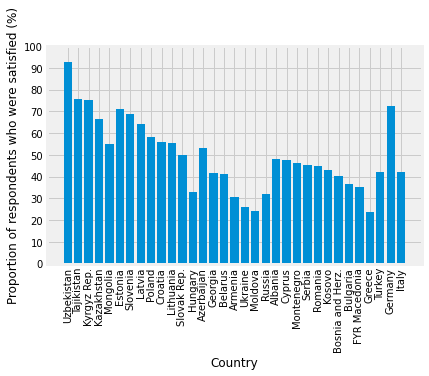

In [13]:
# Plot the replication results
satisfaction_for_plot = replicated_satisfaction.sort_values(by=['Region', 'Life Satisfaction (%)'], ascending=[True,False])
plt.bar(satisfaction_for_plot['Country'], satisfaction_for_plot['Life Satisfaction (%)']);
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Proportion of respondents who were satisfied (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

Figure 1. Mean life satisfaction levels across countries in 2016.<br/>

**Note. Ideally, we would keep the same order of the regions in this bar chart as the original bar chart. Need to figure out how to do this.**

## b) Political System

Next, we try to replicate the results for political system preferences. Specifically, we find the percentage of each country's population who said that 'under some circumstances, an authoritarian government may be preferable to a democratic one'. As before, we first collate the original results in a dataframe.

In [14]:
original_politics = pd.DataFrame()
original_politics[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
original_politics['Authoritarianism (%)'] = [31, 7, 11, 29, 27, 21, 25, 5, 20, 13, 12, np.nan, 12, 16, np.nan, 24, 18, 24, 31, 14, 26, 29, 17, 20, 22, 36, 23, 27, 19, 12, 19, 36, 7]
original_politics.head()

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.0
1,Armenia,True,E Europe & Caucasus,7.0
2,Azerbaijan,True,E Europe & Caucasus,11.0
3,Belarus,True,E Europe & Caucasus,29.0
4,Bosnia and Herz.,True,SE Europe,27.0


Now we calculate the mean level of preference for authoritarianism for the transition region.

In [15]:
# Calculate the mean level of preference for authoritarianism in the transition region.
transition_original_politics = np.mean(original_politics[original_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_original_politics)) + '%')

Transition region preference for authoritarianism: 20%


There are no data in the report about support for authoritarianism in Germany and Italy individually, although the average across the two countries is around 13%, as taken from Chart 3 on p.75 of the LiT III Report (EBRD, 2016).

We do the political system preferences replication, firstly defining the exclusions and criteria.

In [16]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN or -97 ('don't know').
politics_exclusions = [np.nan, -97]

# We want to use those rows for which the answer to the political system preferences question was 'under some circumstances, an authoritarian government may be preferable to a democratic one' (2).
politics_criteria = [2]

In [17]:
replicated_politics = pd.DataFrame()
replicated_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics['Authoritarianism (%)'] = replicated_politics['Country'].apply(uf.calc_mean_percentage, args=(lits_2016, 'Political System', politics_exclusions, politics_criteria)).round(1)
replicated_politics

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.1
1,Armenia,True,E Europe & Caucasus,6.8
2,Azerbaijan,True,E Europe & Caucasus,11.0
3,Belarus,True,E Europe & Caucasus,28.8
4,Bosnia and Herz.,True,SE Europe,26.5
5,Bulgaria,True,SE Europe,21.5
6,Croatia,True,C Europe & Baltics,24.9
7,Cyprus,True,SE Europe,5.1
8,Estonia,True,C Europe & Baltics,20.4
9,FYR Macedonia,True,SE Europe,12.8


In [18]:
differences_politics = pd.DataFrame()
differences_politics['Country'] = original_politics['Country']
differences_politics['Authoritarianism Differences (%)'] = (replicated_politics['Authoritarianism (%)'] - original_politics['Authoritarianism (%)']).round()
differences_politics

,Country,Authoritarianism Differences (%)
0,Albania,0.0
1,Armenia,-0.0
2,Azerbaijan,0.0
3,Belarus,-0.0
4,Bosnia and Herz.,-0.0
5,Bulgaria,0.0
6,Croatia,-0.0
7,Cyprus,0.0
8,Estonia,0.0
9,FYR Macedonia,-0.0


In [19]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_politics = np.mean(replicated_politics[replicated_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_replicated_politics)) + '%')

Transition region preference for authoritarianism: 20%


In [20]:
# Calculate the mean life satisfaction in western Europe.
w_europe_replicated_politics = np.mean(replicated_politics[replicated_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
print('Western Europe preference for authoritarianism: ' + str(round(w_europe_replicated_politics)) + '%')

Western Europe preference for authoritarianism: 13%


All countries' and regions' results were replicated for the question of whether authoritarian government is sometimes preferable.

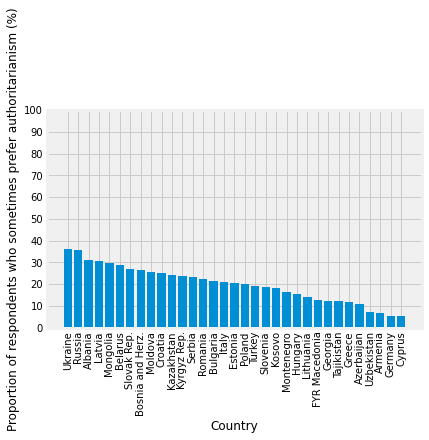

In [21]:
# Plot the replication results
politics_for_plot = replicated_politics.sort_values(by='Authoritarianism (%)', ascending=False)
plt.bar(politics_for_plot['Country'], politics_for_plot['Authoritarianism (%)']);
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Proportion of respondents who sometimes prefer authoritarianism (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

Figure 2. Mean level of preference for authoritarianism across countries in 2016.

## Trying to replicate the results presented by guardian

Note. The Guardian article on the LiTS III (https://www.theguardian.com/world/2016/dec/14/unhappy-russians-nostalgic-for-soviet-style-rule-study) was inaccurate. The article stated that 'just over half the respondents from former Soviet states...thought a return to a more authoritarian system would be a plus in some circumstances'. In figure 2, however, we can see that no country had more than 50% of its respondents answer this way. We suspect that The Guardian claimed this based on an inversion of the EBRD chief economist's statement that 'in most of our countries the majority doesn't seem to prefer democracy over authoritarian rule'. However, the newspaper must not have taken into account that there were two other response options, namely, 'don't know' and 'it does not matter whether a government is democratic or authoritarian'. We briefly test this idea below.

In [22]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN.
guardian_exclusions = [np.nan]

# We want to use those rows for which the answer to the political system preferences question was either 'don't know' (-97), 'under some circumstances, an authoritarian government may be preferable to a democratic one' (2), or 'it does not matter whether a government is democratic or authoritarian' (3).
guardian_criteria = [-97, 2, 3]

In [23]:
replicated_politics_guardian = pd.DataFrame()
replicated_politics_guardian[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics_guardian['USSR'] = replicated_politics_guardian['Country'].apply(uf.ussr_recoder)
replicated_politics_guardian["Don't know / authoritarianism / doesn't matter (%)"] = replicated_politics_guardian['Country'].apply(uf.calc_mean_percentage, args=(lits_2016, 'Political System', guardian_exclusions, guardian_criteria)).round(1)
replicated_politics_guardian.head()

,Country,Transition,Region,USSR,Don't know / authoritarianism / doesn't matter (%)
0,Albania,True,SE Europe,False,52.6
1,Armenia,True,E Europe & Caucasus,True,35.1
2,Azerbaijan,True,E Europe & Caucasus,True,83.8
3,Belarus,True,E Europe & Caucasus,True,68.7
4,Bosnia and Herz.,True,SE Europe,False,59.2


In [24]:
# Calculate the mean level of preference for authoritarianism or political indifference in former Soviet states.
ussr_replicated_politics = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True]["Don't know / authoritarianism / doesn't matter (%)"])
print('Preference for authoritarianism or indifference across former Soviet states: ' + str(round(ussr_replicated_politics)) + '%')

Preference for authoritarianism or indifference across former Soviet states: 54%


## Part 2: Analysis

We test whether there is a correlation between life satisfaction and preference for authoritarianism.

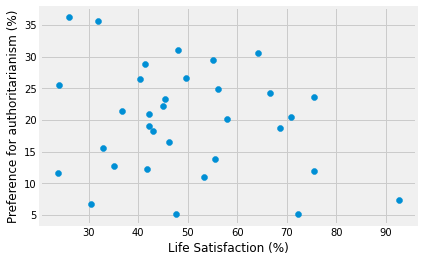

In [25]:
plt.scatter(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)']);
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');

Figure 3. Scatterplot of life satisfaction and preference for authoritarianism.

There is a weak negative correlation between life satisfaction and preference for authoritarianism. That is, broadly speaking, as life satisfaction increases, preference for authoritarianism tends to decrease.

In [27]:
np.mean(uf.standard_units(replicated_satisfaction['Life Satisfaction (%)']) * uf.standard_units(replicated_politics['Authoritarianism (%)']))

-0.22388720208807653